In [123]:
import numpy as np 
import pandas as pd
from SCBert.load_data import DataLoader
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer 
from sklearn.decomposition import LatentDirichletAllocation
from string import punctuation
import pyLDAvis
import pyLDAvis.sklearn
import gensim
pyLDAvis.enable_notebook();

lemmatizer = WordNetLemmatizer()

stopwords=[",",".",";","qu'un","d'un","qu'il","c'est","d'une","j'ai","n'est",
           "the","to","is","","are","an","am","of","in","it","that","my","this","and","for","if","do","at","be","more","out","so",
           "a","abord","absolument","afin","ah","ai","aie","aient","aies","ailleurs","ainsi","ait","allaient","allo","allons","allô","alors","anterieur","anterieure","anterieures","apres","après","as","assez","attendu","au","aucun","aucune","aucuns","aujourd","aujourd'hui","aupres","auquel","aura","aurai","auraient","aurais","aurait","auras","aurez","auriez","aurions","aurons","auront","aussi","autant","autre","autrefois","autrement","autres","autrui","aux","auxquelles","auxquels","avaient","avais","avait","avant","avec","avez","aviez","avions","avoir","avons","ayant","ayez","ayons","b","bah","bas","basee","bat","beau","beaucoup","bien","bigre","bon","boum","bravo","brrr","c","car","ce","ceci","cela","celle","celle-ci","celle-là","celles","celles-ci","celles-là","celui","celui-ci","celui-là","celà","cent","cependant","certain","certaine","certaines","certains","certes","ces","cet","cette","ceux","ceux-ci","ceux-là","chacun","chacune","chaque","cher","chers","chez","chiche","chut","chère","chères","ci","cinq","cinquantaine","cinquante","cinquantième","cinquième","clac","clic","combien","comme","comment","comparable","comparables","compris","concernant","contre","couic","crac","d","da","dans","de","debout","dedans","dehors","deja","delà","depuis","dernier","derniere","derriere","derrière","des","desormais","desquelles","desquels","dessous","dessus","deux","deuxième","deuxièmement","devant","devers","devra","devrait","different","differentes","differents","différent","différente","différentes","différents","dire","directe","directement","dit","dite","dits","divers","diverse","diverses","dix","dix-huit","dix-neuf","dix-sept","dixième","doit","doivent","donc","dont","dos","douze","douzième","dring","droite","du","duquel","durant","dès","début","désormais","e","effet","egale","egalement","egales","eh","elle","elle-même","elles","elles-mêmes","en","encore","enfin","entre","envers","environ","es","essai","est","et","etant","etc","etre","eu","eue","eues","euh","eurent","eus","eusse","eussent","eusses","eussiez","eussions","eut","eux","eux-mêmes","exactement","excepté","extenso","exterieur","eûmes","eût","eûtes","f","fais","faisaient","faisant","fait","faites","façon","feront","fi","flac","floc","fois","font","force","furent","fus","fusse","fussent","fusses","fussiez","fussions","fut","fûmes","fût","fûtes","g","gens","h","ha","haut","hein","hem","hep","hi","ho","holà","hop","hormis","hors","hou","houp","hue","hui","huit","huitième","hum","hurrah","hé","hélas","i","ici","il","ils","importe","j","je","jusqu","jusque","juste","k","l","la","laisser","laquelle","las","le","lequel","les","lesquelles","lesquels","leur","leurs","longtemps","lors","lorsque","lui","lui-meme","lui-même","là","lès","m","ma","maint","maintenant","mais","malgre","malgré","maximale","me","meme","memes","merci","mes","mien","mienne","miennes","miens","mille","mince","mine","minimale","moi","moi-meme","moi-même","moindres","moins","mon","mot","moyennant","multiple","multiples","même","mêmes","n","na","naturel","naturelle","naturelles","ne","neanmoins","necessaire","necessairement","neuf","neuvième","ni","nombreuses","nombreux","nommés","non","nos","notamment","notre","nous","nous-mêmes","nouveau","nouveaux","nul","néanmoins","nôtre","nôtres","o","oh","ohé","ollé","olé","on","ont","onze","onzième","ore","ou","ouf","ouias","oust","ouste","outre","ouvert","ouverte","ouverts","o|","où","p","paf","pan","par","parce","parfois","parle","parlent","parler","parmi","parole","parseme","partant","particulier","particulière","particulièrement","pas","passé","pendant","pense","permet","personne","personnes","peu","peut","peuvent","peux","pff","pfft","pfut","pif","pire","pièce","plein","plouf","plupart","plus","plusieurs","plutôt","possessif","possessifs","possible","possibles","pouah","pour","pourquoi","pourrais","pourrait","pouvait","prealable","precisement","premier","première","premièrement","pres","probable","probante","procedant","proche","près","psitt","pu","puis","puisque","pur","pure","q","qu","quand","quant","quant-à-soi","quanta","quarante","quatorze","quatre","quatre-vingt","quatrième","quatrièmement","que","quel","quelconque","quelle","quelles","quelqu'un","quelque","quelques","quels","qui","quiconque","quinze","quoi","quoique","r","rare","rarement","rares","relative","relativement","remarquable","rend","rendre","restant","reste","restent","restrictif","retour","revoici","revoilà","rien","s","sa","sacrebleu","sait","sans","sapristi","sauf","se","sein","seize","selon","semblable","semblaient","semble","semblent","sent","sept","septième","sera","serai","seraient","serais","serait","seras","serez","seriez","serions","serons","seront","ses","seul","seule","seulement","si","sien","sienne","siennes","siens","sinon","six","sixième","soi","soi-même","soient","sois","soit","soixante","sommes","son","sont","sous","souvent","soyez","soyons","specifique","specifiques","speculatif","stop","strictement","subtiles","suffisant","suffisante","suffit","suis","suit","suivant","suivante","suivantes","suivants","suivre","sujet","superpose","sur","surtout","t","ta","tac","tandis","tant","tardive","te","tel","telle","tellement","telles","tels","tenant","tend","tenir","tente","tes","tic","tien","tienne","tiennes","tiens","toc","toi","toi-même","ton","touchant","toujours","tous","tout","toute","toutefois","toutes","treize","trente","tres","trois","troisième","troisièmement","trop","très","tsoin","tsouin","tu","té","u","un","une","unes","uniformement","unique","uniques","uns","v","va","vais","valeur","vas","vers","via","vif","vifs","vingt","vivat","vive","vives","vlan","voici","voie","voient","voilà","voire","vont","vos","votre","vous","vous-mêmes","vu","vé","vôtre","vôtres","w","x","y","z","zut","à","â","ça","ès","étaient","étais","était","étant","état","étiez","étions","été","étée","étées","étés","êtes","être","ô"]


In [76]:
cls = DataLoader().load_cls_fr() #.sample(frac=1)

In [3]:
for punc in punctuation :
    cls.review = cls.review.str.replace(punc,' ')
cls.review = cls.review.str.split(" ")
for i,message in enumerate(cls.review) :
    cls.review.iloc[i]= [lemmatizer.lemmatize(word) for word in message if word.lower() not in stopwords]
cls.review = cls.review.str.join(" ")

/Users/yang/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [77]:
cls

,category,title,review,rating,code
0,DVD,X-men origins - Wolverine - Edition simple,Alors que les premiers X-men avaient l'affecti...,2.0,0
1,DVD,X-men origins - Wolverine - Edition simple,on attendait bien plus sur cette génèse; les e...,2.0,0
2,DVD,Harry Potter et le prince de sang-mêlé - Editi...,"Une histoire qui s'éloigne du livre, des scène...",2.0,0
3,DVD,X-men origins - Wolverine [Blu-ray],"Wolverine est de retour, sans les X-Men et por...",2.0,0
4,DVD,Kaamelott : Livre VI - Coffret 4 DVD,"Grand fan de la période ""épisodes courts et dr...",2.0,0
5,DVD,"Star Trek , le film 2009 [Blu-ray]",VRAIMENT PAS CONTENT\n Le son n est pas du tou...,1.0,0
6,DVD,Le 10ème royaume - Coffret Collector 3 DVD,C'est un réel plaisir de replonger dans cette ...,4.0,0
7,DVD,LoL - Laughing out Loud,"J'ai trouvé ce film très moyen. Un ersatz de ""...",1.0,0
8,DVD,LoL - Laughing out Loud,ILS EN ONT FAIT DE LA PUBLICITE AUTOUR DE CE F...,1.0,0
9,DVD,Billy Elliot,"Dans la lignée de ""Full Monty"", ""My name is Jo...",5.0,0


In [113]:
count_vectorizer = CountVectorizer(min_df = 15, max_df = 0.10)
dtm_count = count_vectorizer.fit_transform(cls.review)
print(dtm_count.shape)

(6000, 3225)


In [114]:
lda_count = LatentDirichletAllocation(n_components=3, random_state=1)
lda_count.fit(dtm_count)

LatentDirichletAllocation(n_components=3, random_state=1)

In [115]:
doc_topic = lda_count.transform(dtm_count)
feature_names = count_vectorizer.get_feature_names()
labels = np.argmax(doc_topic, axis = 1)

In [116]:
for topic_idx, topic in enumerate(lda_count.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:10]])
        print(message)
        print()

Topic #0: great there was alive with come only muse let accrocheurs

Topic #1: mène êtres they étude destins victime his enquête eastwood théorie

Topic #2: théories vocabulaire rebondissement dévoré bêtise éducation exposé conseils anneaux tolkien



In [117]:
for topic_idx, topic in enumerate(lda_count.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:10]])
        print(message)
        print()

Topic #0: great there was alive with come only muse let accrocheurs

Topic #1: mène êtres they étude destins victime his enquête eastwood théorie

Topic #2: théories vocabulaire rebondissement dévoré bêtise éducation exposé conseils anneaux tolkien



In [118]:
viz = pyLDAvis.sklearn.prepare(lda_count, dtm_count, count_vectorizer)
viz

/Users/yang/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.105822  0.077517       1        1  51.706200
1     -0.045201 -0.101464       2        1  25.709797
2      0.151023  0.023947       3        1  22.584003, topic_info=     Category         Freq         Term        Total  loglift  logprob
2867  Default  1090.000000          the  1090.000000  30.0000  30.0000
1289  Default   771.000000       groupe   771.000000  29.0000  29.0000
1925  Default   497.000000           of   497.000000  28.0000  28.0000
902   Default   639.000000          dvd   639.000000  27.0000  27.0000
2487  Default   567.000000         rock   567.000000  26.0000  26.0000
1818  Default   729.000000      musique   729.000000  25.0000  25.0000
845   Default   613.000000       disque   613.000000  24.0000  24.0000
1411  Default   321.000000           in   321.000000  23.0000  23.0000
447   Default   480.000000           cd   480.000000  22.0000  22.0000
3082  Default   549.000000         voix   549.000000  21.0000  21.0000
2889  Default   253.000000           to   253.000000  20.0000  20.0000
167   Default   252.000000          and   252.000000  19.0000  19.0000
277   Default   566.000000       auteur   566.000000  18.0000  18.0000
2888  Default   460.000000       titres   460.000000  17.0000  17.0000
2074  Default   523.000000  personnages   523.000000  16.0000  16.0000
479   Default   427.000000     chansons   427.000000  15.0000  15.0000
1602  Default   510.000000         lire   510.000000  14.0000  14.0000
2492  Default   481.000000        roman   481.000000  13.0000  13.0000
1716  Default   226.000000         meme   226.000000  12.0000  12.0000
415   Default   233.000000           ca   233.000000  11.0000  11.0000
121   Default   382.000000       albums   382.000000  10.0000  10.0000
3138  Default   196.000000          you   196.000000   9.0000   9.0000
1792  Default   349.000000     morceaux   349.000000   8.0000   8.0000
2941  Default   209.000000         tres   209.000000   7.0000   7.0000
57    Default   256.000000      acheter   256.000000   6.0000   6.0000
1767  Default   526.000000          moi   526.000000   5.0000   5.0000
1773  Default   548.000000          mon   548.000000   4.0000   4.0000
1492  Default   155.000000           it   155.000000   3.0000   3.0000
3026  Default   368.000000      version   368.000000   2.0000   2.0000
2161  Default   222.000000          pop   222.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
365    Topic3   122.218775        blues   128.145671   1.4406  -5.9757
2487   Topic3   506.613856         rock   567.994087   1.3736  -4.5538
1297   Topic3   138.122090      guitare   148.109878   1.4181  -5.8534
330    Topic3    76.003972     batterie    79.099823   1.4480  -6.4507
1289   Topic3   614.650392       groupe   771.614588   1.2605  -4.3605
324    Topic3    76.177081        basse    80.086562   1.4379  -6.4485
1817   Topic3   102.827126    musiciens   112.051489   1.4020  -6.1485
150    Topic3   166.402123          amp   193.845148   1.3353  -5.6671
357    Topic3    82.136538        black    88.064636   1.4182  -6.3731
2989   Topic3    62.094095           up    64.090082   1.4563  -6.6529
845    Topic3   419.680199       disque   613.604007   1.1081  -4.7420
2161   Topic3   173.113662          pop   222.521672   1.2369  -5.6276
1791   Topic3   132.938184      morceau   161.784163   1.2915  -5.8916
1792   Topic3   231.292812     morceaux   349.489532   1.0751  -5.3378
1818   Topic3   401.494756      musique   729.277576   0.8911  -4.7863
1613   Topic3   139.612511         live   190.430630   1.1775  -5.8427
121    Topic3   220.510683       albums   382.732169   0.9365  -5.3856
2888   Topic3   247.396079       titres   460.922021   0.8657  -5.2705
2240   Topic3   118.547321   production   155.611723   1.2159  -6.0062
3082   Topic3   259.760289         voix   549.674800   0.7384  -5.

In [119]:
viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.105822  0.077517       1        1  51.706200
1     -0.045201 -0.101464       2        1  25.709797
2      0.151023  0.023947       3        1  22.584003, topic_info=     Category         Freq         Term        Total  loglift  logprob
2867  Default  1090.000000          the  1090.000000  30.0000  30.0000
1289  Default   771.000000       groupe   771.000000  29.0000  29.0000
1925  Default   497.000000           of   497.000000  28.0000  28.0000
902   Default   639.000000          dvd   639.000000  27.0000  27.0000
2487  Default   567.000000         rock   567.000000  26.0000  26.0000
1818  Default   729.000000      musique   729.000000  25.0000  25.0000
845   Default   613.000000       disque   613.000000  24.0000  24.0000
1411  Default   321.000000           in   321.000000  23.0000  23.0000
447   Default   480.000000           cd   480.000000  22.0000  22.0000
3082  Default   549.000000         voix   549.000000  21.0000  21.0000
2889  Default   253.000000           to   253.000000  20.0000  20.0000
167   Default   252.000000          and   252.000000  19.0000  19.0000
277   Default   566.000000       auteur   566.000000  18.0000  18.0000
2888  Default   460.000000       titres   460.000000  17.0000  17.0000
2074  Default   523.000000  personnages   523.000000  16.0000  16.0000
479   Default   427.000000     chansons   427.000000  15.0000  15.0000
1602  Default   510.000000         lire   510.000000  14.0000  14.0000
2492  Default   481.000000        roman   481.000000  13.0000  13.0000
1716  Default   226.000000         meme   226.000000  12.0000  12.0000
415   Default   233.000000           ca   233.000000  11.0000  11.0000
121   Default   382.000000       albums   382.000000  10.0000  10.0000
3138  Default   196.000000          you   196.000000   9.0000   9.0000
1792  Default   349.000000     morceaux   349.000000   8.0000   8.0000
2941  Default   209.000000         tres   209.000000   7.0000   7.0000
57    Default   256.000000      acheter   256.000000   6.0000   6.0000
1767  Default   526.000000          moi   526.000000   5.0000   5.0000
1773  Default   548.000000          mon   548.000000   4.0000   4.0000
1492  Default   155.000000           it   155.000000   3.0000   3.0000
3026  Default   368.000000      version   368.000000   2.0000   2.0000
2161  Default   222.000000          pop   222.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
365    Topic3   122.218775        blues   128.145671   1.4406  -5.9757
2487   Topic3   506.613856         rock   567.994087   1.3736  -4.5538
1297   Topic3   138.122090      guitare   148.109878   1.4181  -5.8534
330    Topic3    76.003972     batterie    79.099823   1.4480  -6.4507
1289   Topic3   614.650392       groupe   771.614588   1.2605  -4.3605
324    Topic3    76.177081        basse    80.086562   1.4379  -6.4485
1817   Topic3   102.827126    musiciens   112.051489   1.4020  -6.1485
150    Topic3   166.402123          amp   193.845148   1.3353  -5.6671
357    Topic3    82.136538        black    88.064636   1.4182  -6.3731
2989   Topic3    62.094095           up    64.090082   1.4563  -6.6529
845    Topic3   419.680199       disque   613.604007   1.1081  -4.7420
2161   Topic3   173.113662          pop   222.521672   1.2369  -5.6276
1791   Topic3   132.938184      morceau   161.784163   1.2915  -5.8916
1792   Topic3   231.292812     morceaux   349.489532   1.0751  -5.3378
1818   Topic3   401.494756      musique   729.277576   0.8911  -4.7863
1613   Topic3   139.612511         live   190.430630   1.1775  -5.8427
121    Topic3   220.510683       albums   382.732169   0.9365  -5.3856
2888   Topic3   247.396079       titres   460.922021   0.8657  -5.2705
2240   Topic3   118.547321   production   155.611723   1.2159  -6.0062
3082   Topic3   259.760289         voix   549.674800   0.7384  -5.

In [120]:
topics_keywords = []
for i in range (1,4) :
    l = viz.topic_info[viz.topic_info.Category == "Topic{}".format(i)]
    topics_keywords.append(l.sort_values(by="Freq", ascending=False)["Term"][:15])

In [125]:
#from gensim.models.coherencemodel import CoherenceModel
#from gensim.corpora import Dictionary
cm = CoherenceModel(topics=topics_keywords, texts=cls.review, dictionary=Dictionary(cls.review) , coherence="c_v")

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [126]:
for i in range (3):
    print("For cluster {} the coherence is {}".format(i,cm.get_coherence_per_topic()[i]))
    print("keywords are : \n")
    for word in topics_keywords[i].values :
        print(word)
    print()

NameError: name 'cm' is not defined

In [147]:
for i in range (3):
    print("For cluster {} the coherence is {}".format(i,cm.get_coherence_per_topic()[i]))
    print("keywords are : \n")
    for word in topics_keywords[i].values :
        print(word)
    print()

For cluster 0 the overal coherence is 0.5220120616179623
keywords are : 

auteur
roman
vie
lira
personnages
monde
page
fin
homme
temp
amour
ouvrage
mal
lecture
lu

For cluster 1 the overal coherence is 0.5999509514284544
keywords are : 

groupe
rock
disque
morceau
cd
voix
chansons
musique
fan
chanson
écouter
écoute
pop
you
ca

For cluster 2 the overal coherence is 0.36256458135377795
keywords are : 

dvd
version
image
voir
musique
acteurs
scène
qualité
série
scénario
mal
fan
oeuvre
mieux
années



In [78]:
from SCBert.SCBert import Vectorizer

vectorizer = Vectorizer("flaubert_base")
text_vectors = vectorizer.vectorize(cls.review,sentence_pooling_method="average", word_pooling_method="average")

100%|█████████▉| 99.59999999999984/100 [43:09<00:10, 26.00s/it] 


In [98]:
from SCBert.SCBert import Vectorizer

vectorizer = Vectorizer("flaubert_base")
text_vectorsMax = vectorizer.vectorize(cls.review,sentence_pooling_method="max", word_pooling_method="max",layers =[10,11,12])

100%|█████████▉| 99.59999999999984/100 [47:51<00:11, 28.83s/it]   


In [99]:
from SCBert.SCBert import EmbeddingExplorer

ee = EmbeddingExplorer(cls.review,text_vectors)
labels = ee.cluster(k=3)                     #Cluster with k-means 
ee.extract_keywords(max_words = 1, min_freq=5, num_top_words=10)    
#ee.explore(color = labels) 

{'Cluster 0': array(["n'y", 'mal', 'cerveau', 'scènes', 'point', 'idéal', 'soirée',
        'restera', 'service', 'film'], dtype='<U7'),
 'Cluster 1': array(['histoire', 'livre', 'gauche', 'surtout', 'film', "c'est", 'fan',
        'livres', 'films', 'cinéma'], dtype='<U8'),
 'Cluster 2': array(['vraiment', 'hauteur', 'meme', 'prix', 'souvent', 'cas', 'blu-ray',
        'pub', 'image', 'belle'], dtype='<U8')}

In [139]:
from SCBert.SCBert import EmbeddingExplorer

ee = EmbeddingExplorer(cls.review,text_vectorsMax)
labels = ee.cluster(k=3)                     #Cluster with k-means 
ee.extract_keywords(max_words = 1, min_freq=5, num_top_words=10)    
#ee.explore(color = labels) 

AttributeError: 'torch.return_types.max' object has no attribute 'tolist'

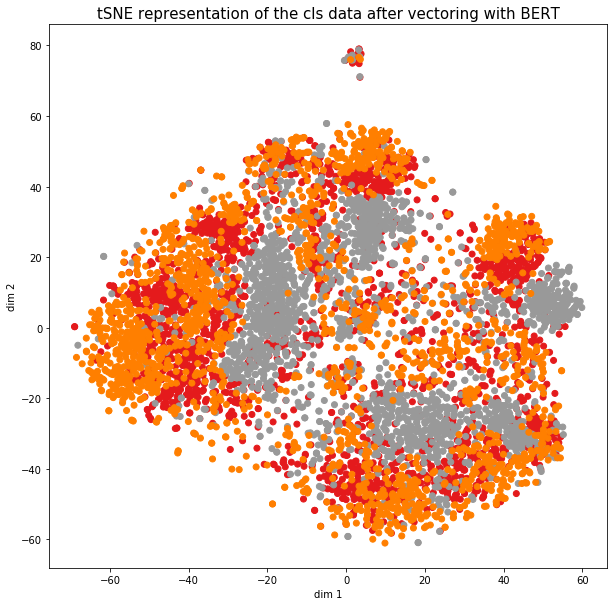

Proportion of cluster 0 : 0.373
Proportion of cluster 1 : 0.358
Proportion of cluster 2 : 0.269


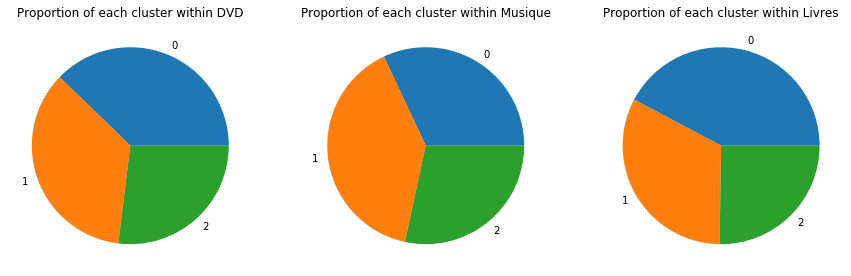

In [101]:
ee.explore_cls(cls.code,  projection_method= "tSNE")  #color_label = labels , "tSNE"

In [84]:
ee.extract_keywords_and_coherence(vectorizer)

KeyError: 'C'

In [103]:
keywords=ee.extract_keywords(max_words = 1, min_freq=5, num_top_words=10)    

In [104]:
ee.compute_coherence(vectorizer)

Cluster 0 with keywords : 
 ["n'y" 'mal' 'cerveau' 'scènes' 'point' 'idéal' 'soirée' 'restera'
 'service' 'film'] 
 has a coherence of 0.31148675849454144 

Cluster 1 with keywords : 
 ['histoire' 'livre' 'gauche' 'surtout' 'film' "c'est" 'fan' 'livres'
 'films' 'cinéma'] 
 has a coherence of 0.33704520546901934 

Cluster 2 with keywords : 
 ['vraiment' 'hauteur' 'meme' 'prix' 'souvent' 'cas' 'blu-ray' 'pub'
 'image' 'belle'] 
 has a coherence of 0.39525027833562815 



[0.31148675849454144, 0.33704520546901934, 0.39525027833562815]

In [93]:
keywords

{'Cluster 0': array(["n'y", 'mal', 'cerveau', 'scènes', 'point', 'idéal', 'soirée',
        'restera', 'service', 'film'], dtype='<U7'),
 'Cluster 1': array(['histoire', 'livre', 'gauche', 'surtout', 'film', "c'est", 'fan',
        'livres', 'films', 'cinéma'], dtype='<U8'),
 'Cluster 2': array(['vraiment', 'hauteur', 'meme', 'prix', 'souvent', 'cas', 'blu-ray',
        'pub', 'image', 'belle'], dtype='<U8')}

In [96]:
ee.compute_coherence(vectorizer)

Cluster 0 with keywords : 
 ["n'y" 'mal' 'cerveau' 'scènes' 'point' 'idéal' 'soirée' 'restera'
 'service' 'film'] 
 has a coherence of 0.31148675849454144 

Cluster 1 with keywords : 
 ['histoire' 'livre' 'gauche' 'surtout' 'film' "c'est" 'fan' 'livres'
 'films' 'cinéma'] 
 has a coherence of 0.33704520546901934 

Cluster 2 with keywords : 
 ['vraiment' 'hauteur' 'meme' 'prix' 'souvent' 'cas' 'blu-ray' 'pub'
 'image' 'belle'] 
 has a coherence of 0.39525027833562815 



[0.31148675849454144, 0.33704520546901934, 0.39525027833562815]

In [141]:
text_vectorsMax.shape

AttributeError: 'list' object has no attribute 'shape'

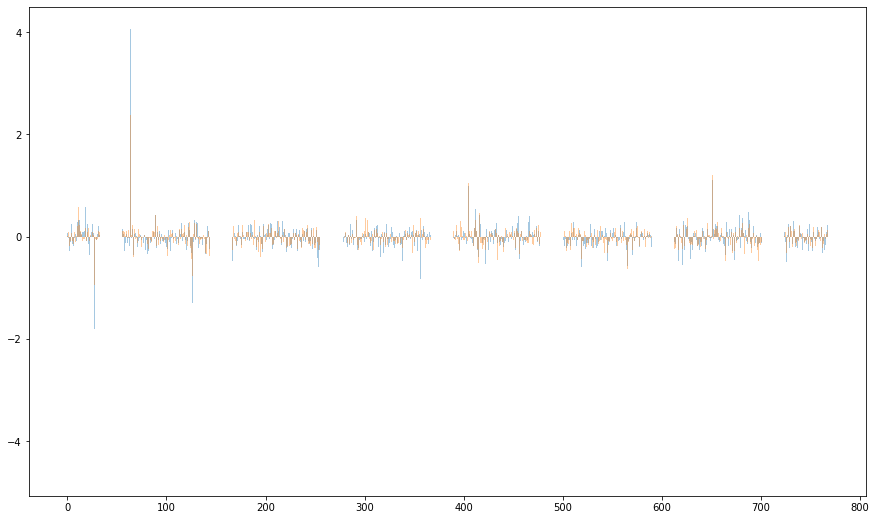

In [142]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
plt.bar(range(768),text_vectors[111],alpha=0.4)
plt.bar(range(768),text_vectors[2], alpha=0.4)
#plt.bar(range(768),vec3, alpha=0.3)
plt.show()